# LIMPIEZA PARTE I

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Importar las funciones de limpieza que ya creaste
import sys
sys.path.append('../')
from src import limpieza as sl

# Configuración de pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías importadas correctamente")
print(f"📅 Fecha de ejecución: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

✅ Librerías importadas correctamente
📅 Fecha de ejecución: 2025-11-15 17:27


In [2]:
# Definir rutas
ruta_raw = '../data/raw/csv'
ruta_processed = '../data/processed'
ruta_interim = '../data/interim'

# Verificar que las carpetas existen
if os.path.exists(ruta_raw) and os.path.exists(ruta_processed):
    print("✅ Rutas de datos verificadas")
else:
    print("❌ Error: Verifica las rutas de las carpetas")

✅ Rutas de datos verificadas


## Explorar el archivo CO282 (Flujos entre CCAA)

In [3]:
print("\n" + "="*40)
print("📂 CO282 - FLUJOS ENTRE CCAA")
print("="*40)

# Cargar el archivo CO282
archivo_co282 = 'CO282_CO281_Flujos_Nac_Merc_Veh_Espanyoles_Carr_entre_CCAAs_Anyo.csv'
df_co282 = pd.read_csv(os.path.join(ruta_raw, archivo_co282), 
                        encoding='utf-8', 
                        sep=',',
                        decimal=',')

print(f"📊 Dimensiones del dataset: {df_co282.shape}")
print(f"\n📋 Columnas encontradas:")
for col in df_co282.columns:
    print(f"   - {col}")

# Ver las primeras filas
df_co282.head()


📂 CO282 - FLUJOS ENTRE CCAA
📊 Dimensiones del dataset: (3600, 5)

📋 Columnas encontradas:
   - year
   - ComunidadOrigen
   - Unidad
   - ComunidadDestino
   - valor


,year,ComunidadOrigen,Unidad,ComunidadDestino,valor
0,2017,Andalucía,Miles de toneladas,Andalucía,"172.587,62"
1,2017,Andalucía,Miles de toneladas,Aragón,"555,86"
2,2017,Andalucía,Miles de toneladas,"Asturias, Principado de","133,82"
3,2017,Andalucía,Miles de toneladas,Cantabria,"102,57"
4,2017,Andalucía,Miles de toneladas,Castilla - La Mancha,"3.513,80"


In [4]:
# Analizar años disponibles
print("📅 Años disponibles:")
print(sorted(df_co282['year'].unique()))

# Analizar unidades
print("\n📏 Unidades encontradas:")
print(df_co282['Unidad'].unique())

# Ver cuántas combinaciones origen-destino hay por año
combinaciones_por_año = df_co282.groupby('year').size()
print(f"\n📊 Registros por año:")
print(combinaciones_por_año)

# Verificar si hay valores nulos o problemáticos
print(f"\n❓ Valores nulos por columna:")
print(df_co282.isnull().sum())

# Ver algunos ejemplos de valores
print("\n🔍 Muestra de valores en la columna 'valor':")
print(df_co282['valor'].head(10))

📅 Años disponibles:
[np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]

📏 Unidades encontradas:
['Miles de toneladas' 'Millones de toneladas-kilómetro']

📊 Registros por año:
year
2017    450
2018    450
2019    450
2020    450
2021    450
2022    450
2023    450
2024    450
dtype: int64

❓ Valores nulos por columna:
year                 0
ComunidadOrigen      0
Unidad               0
ComunidadDestino     0
valor               10
dtype: int64

🔍 Muestra de valores en la columna 'valor':
0    172.587,62
1        555,86
2        133,82
3        102,57
4      3.513,80
5      1.240,55
6      2.378,83
7      4.619,26
8      3.797,74
9        334,38
Name: valor, dtype: object


In [5]:
# Crear una copia para trabajar
df_co282_copy = df_co282.copy()

# 1. Limpiar la columna valor usando tu función
df_co282_copy['valor'] = df_co282_copy['valor'].apply(sl.limpiar_valor_numerico)

# 2. Verificar los valores nulos
print("🔍 Análisis de valores nulos:")
nulos = df_co282_copy[df_co282_copy['valor'].isnull()]
print(f"- Total de valores nulos: {len(nulos)}")
if len(nulos) > 0:
    print("\nEjemplos de registros con valores nulos:")
    print(nulos[['ComunidadOrigen', 'ComunidadDestino', 'year', 'Unidad']].head())

# 3. Estadísticas por unidad
print("\n📊 Estadísticas por tipo de unidad:")
for unidad in df_co282_copy['Unidad'].unique():
    datos_unidad = df_co282_copy[df_co282_copy['Unidad'] == unidad]['valor']
    print(f"\n{unidad}:")
    print(f"  - Registros: {len(datos_unidad)}")
    print(f"  - Valores no nulos: {datos_unidad.notna().sum()}")
    print(f"  - Media: {datos_unidad.mean():.2f}")
    print(f"  - Mediana: {datos_unidad.median():.2f}")
    print(f"  - Máximo: {datos_unidad.max():.2f}")

🔍 Análisis de valores nulos:
- Total de valores nulos: 10

Ejemplos de registros con valores nulos:
     ComunidadOrigen ComunidadDestino  year                           Unidad
704      Extremadura        Rioja, La  2018               Miles de toneladas
719      Extremadura        Rioja, La  2018  Millones de toneladas-kilómetro
878        Rioja, La      Extremadura  2018               Miles de toneladas
893        Rioja, La      Extremadura  2018  Millones de toneladas-kilómetro
1593     Extremadura        Cantabria  2020               Miles de toneladas

📊 Estadísticas por tipo de unidad:

Miles de toneladas:
  - Registros: 1800
  - Valores no nulos: 1795
  - Media: 6187.13
  - Mediana: 889.53
  - Máximo: 204473.18

Millones de toneladas-kilómetro:
  - Registros: 1800
  - Valores no nulos: 1795
  - Media: 750.33
  - Mediana: 347.82
  - Máximo: 12855.27


In [6]:
# Separar por tipo de unidad
df_co282_toneladas = df_co282_copy[
    df_co282_copy['Unidad'] == 'Miles de toneladas'
].copy()

df_co282_ton_km = df_co282_copy[
    df_co282_copy['Unidad'] == 'Millones de toneladas-kilómetro'
].copy()

# Limpiar nombres de columnas
df_co282_toneladas.columns = ['Año', 'CCAA Origen', 'unidad', 'CCAA Destino', 'Toneladas(miles)']
df_co282_ton_km.columns = ['Año', 'CCAA Origen', 'unidad', 'CCAA Destino', 'Ton-Km(millones)']

# Eliminar la columna unidad ya que ahora es redundante
df_co282_toneladas = df_co282_toneladas.drop('unidad', axis=1)
df_co282_ton_km = df_co282_ton_km.drop('unidad', axis=1)

print("📊 Datasets separados:")
print(f"- Toneladas(miles): {df_co282_toneladas.shape}")
print(f"- Toneladas-km(millones): {df_co282_ton_km.shape}")


📊 Datasets separados:
- Toneladas(miles): (1800, 4)
- Toneladas-km(millones): (1800, 4)


In [7]:
keys_cs282 = ['Año', 'CCAA Origen','CCAA Destino']
dups_ton_cs_282 = df_co282_toneladas.duplicated(subset=keys_cs282).sum()
dups_ton_km_cs282   = df_co282_ton_km.duplicated(subset=keys_cs282).sum()
print('Duplicados ton_km:', dups_ton_km_cs282, ' | Duplicados toneladas:', dups_ton_cs_282)

# Cardinalidad de claves
print('Registros ton_km:', len(df_co282_toneladas), ' | Registros toneladas:', len(df_co282_ton_km))
print('Claves únicas ton_km:', df_co282_toneladas[keys_cs282].drop_duplicates().shape[0])
print('Claves únicas toneladas:', df_co282_ton_km[keys_cs282].drop_duplicates().shape[0])

Duplicados ton_km: 0  | Duplicados toneladas: 0
Registros ton_km: 1800  | Registros toneladas: 1800
Claves únicas ton_km: 1800
Claves únicas toneladas: 1800


In [8]:
df_co282_final = df_co282_ton_km.merge(
    df_co282_toneladas,
    on=['Año', 'CCAA Origen','CCAA Destino'],
    how='inner',
    validate='one_to_one'  # ver si hay duplicados en las claves
)
df_co282_final

,Año,CCAA Origen,CCAA Destino,Ton-Km(millones),Toneladas(miles)
0,2017,Andalucía,Andalucía,10234.75,172587.62
1,2017,Andalucía,Aragón,460.45,555.86
2,2017,Andalucía,"Asturias, Principado de",127.08,133.82
3,2017,Andalucía,Cantabria,87.48,102.57
4,2017,Andalucía,Castilla - La Mancha,1384.10,3513.80
...,...,...,...,...,...
1795,2024,"Rioja, La","Madrid, Comunidad de",85.86,252.95
1796,2024,"Rioja, La","Murcia, Región de",30.19,46.75
1797,2024,"Rioja, La","Navarra, Comunidad Foral de",106.34,1573.53
1798,2024,"Rioja, La",País Vasco,130.59,1162.06


In [9]:
# Normalizar texto
for c in ['CCAA Origen', 'CCAA Destino']:
    df_co282_final[c] = df_co282_final[c].astype(str).str.strip().str.title()
df_co282_final

,Año,CCAA Origen,CCAA Destino,Ton-Km(millones),Toneladas(miles)
0,2017,Andalucía,Andalucía,10234.75,172587.62
1,2017,Andalucía,Aragón,460.45,555.86
2,2017,Andalucía,"Asturias, Principado De",127.08,133.82
3,2017,Andalucía,Cantabria,87.48,102.57
4,2017,Andalucía,Castilla - La Mancha,1384.10,3513.80
...,...,...,...,...,...
1795,2024,"Rioja, La","Madrid, Comunidad De",85.86,252.95
1796,2024,"Rioja, La","Murcia, Región De",30.19,46.75
1797,2024,"Rioja, La","Navarra, Comunidad Foral De",106.34,1573.53
1798,2024,"Rioja, La",País Vasco,130.59,1162.06


In [10]:
# Guardar los archivos limpios
df_co282_ton = os.path.join(ruta_interim, 'CO282_flujos_ccaa_toneladas_interim.csv')
df_co282_km = os.path.join(ruta_interim, 'CO282_flujos_ccaa_ton_km_interim.csv')
co282_final = os.path.join(ruta_processed, 'CO282_flujos_ccaa_origen_destino_clean.csv')

# Guardar con formato estándar
df_co282_toneladas.to_csv(df_co282_ton, index=False, encoding='utf-8')
df_co282_ton_km.to_csv(df_co282_km, index=False, encoding='utf-8')
df_co282_final.to_csv(co282_final, index=False, encoding='utf-8')



## Explorar el archivo CO285 (Operaciones en Vacío)

In [11]:
print("\n" + "="*40)
print("📂 CO285 - OPERACIONES EN VACÍO")
print("="*40)


# Cargar el archivo
path = os.path.join(ruta_raw, "CO285_OperVacio_Veh_Espanyoles_Carr__CCAA_TipoDesplaz_Anyo.csv")
df_co285 = pd.read_csv(path, sep=',', encoding='utf-8', decimal=',')

print(f"\n📊 Dimensiones del dataset: {df_co285.shape}")
print(f"\n📋 Columnas encontradas:")
for col in df_co285.columns:
    print(f"   - {col}")

# Ver las primeras filas
print("\n🔍 Primeras 5 filas:")
df_co285.head(5)


📂 CO285 - OPERACIONES EN VACÍO

📊 Dimensiones del dataset: (1728, 13)

📋 Columnas encontradas:
   - comunidad
   - Estado_Operacion
   - year
   - Tipo_transporte2
   - tipo_desplazamiento
   - valor2
   - Textbox12
   - Textbox13
   - Textbox21
   - Textbox23
   - Textbox7
   - Textbox9
   - Textbox10

🔍 Primeras 5 filas:


,comunidad,Estado_Operacion,year,Tipo_transporte2,tipo_desplazamiento,valor2,Textbox12,Textbox13,Textbox21,Textbox23,Textbox7,Textbox9,Textbox10
0,Andalucía,Número de operaciones en vacío,2017,Transporte intrarregional,Intramunicipal,3.816.169,Total Transporte intrarregional,11.593.133,Total 2017,12.742.156,"46,95%","46,67%","42,18%"
1,Andalucía,Número de operaciones en vacío,2017,Transporte intrarregional,Intermunicipal intrarregional,7.776.964,Total Transporte intrarregional,11.593.133,Total 2017,12.742.156,"46,53%","46,67%","42,18%"
2,Andalucía,Número de operaciones en vacío,2017,Transporte interregional,Expedido,637.989,Total Transporte interregional,1.074.590,Total 2017,12.742.156,"27,90%","22,29%","42,18%"
3,Andalucía,Número de operaciones en vacío,2017,Transporte interregional,Recibido,436.601,Total Transporte interregional,1.074.590,Total 2017,12.742.156,"17,22%","22,29%","42,18%"
4,Andalucía,Número de operaciones en vacío,2017,Transporte internacional,Expedido (exportaciones),16.685,Total Transporte internacional,74.433,Total 2017,12.742.156,"4,67%","13,64%","42,18%"


In [12]:
# Crear copia para limpieza
df_co285_copy = df_co285.copy()

# Limpiar la columna valor2
df_co285_copy['valor2'] = df_co285_copy['valor2'].apply(sl.limpiar_valor_numerico)

# Limpiar las columnas de totales numéricas
columnas_numericas = ['Textbox13', 'Textbox23']
for col in columnas_numericas:
    df_co285_copy[col] = df_co285_copy[col].apply(sl.limpiar_valor_numerico)

# Limpiar columnas de porcentajes (eliminar % y convertir)
def limpiar_porcentaje(valor):
    """Convierte valores de porcentaje a float"""
    if isinstance(valor, str):
        # Eliminar el símbolo % y convertir
        valor = valor.replace('%', '').replace(',', '.')
        try:
            return float(valor)
        except:
            return np.nan
    return valor

columnas_porcentajes = ['Textbox7', 'Textbox9', 'Textbox10']
for col in columnas_porcentajes:
    df_co285_copy[col] = df_co285_copy[col].apply(limpiar_porcentaje)

# Renombrar columnas para mayor claridad
df_co285_copy = df_co285_copy.rename(columns={
    'year':'Año',
    'comunidad':'CCAA',
    'Tipo_transporte2':'Ámbito',
    'tipo_desplazamiento':'Categoría',
    'valor2': 'Operaciones Vacío',
    'Textbox7': '% Vacío',
    'Textbox9': 'porcentaje_sobre_total_tipo',
    'Textbox10': 'porcentaje_sobre_total_anual',
    'Textbox12': 'categoria_total',
    'Textbox13': 'total_operaciones_tipo'
})

# Seleccionar solo las columnas relevantes
columnas_finales = [
    'CCAA', 'Año', 'Ámbito', 'Categoría',
    'Operaciones Vacío', '% Vacío'
]

df_co285_copy = df_co285_copy[columnas_finales].copy()

# Eliminamos la palabra "Transporte " solo si aparece en la columna "Ámbito"
df_co285_copy["Ámbito"] = df_co285_copy["Ámbito"].str.replace(r"^Transporte\s+", "", regex=True)

# Normalizar texto
for c in ['CCAA', 'Año', 'Ámbito', 'Categoría']:
    df_co285_copy[c] = df_co285_copy[c].astype(str).str.strip().str.title()


df_co285_copy['Categoría'] = df_co285_copy['Categoría'].replace({
    'Recibido (Importaciones)': 'Recibido',
    'Expedido (Exportaciones)': 'Expedido'
})

df_co285_copy["Categoría"] = df_co285_copy["Categoría"].str.replace("Intermunicipal Intrarregional", "Intermunicipal", regex=False)


# Ver resumen
print("✅ Dataset CO285 limpio:")
print(f"Dimensiones: {df_co285_copy.shape}")
print(f"\n📊 Primeras filas del dataset limpio:")
df_co285_copy.sample(5)

✅ Dataset CO285 limpio:
Dimensiones: (1728, 6)

📊 Primeras filas del dataset limpio:


,CCAA,Año,Ámbito,Categoría,Operaciones Vacío,% Vacío
1615,País Vasco,2022,Intrarregional,Intermunicipal,6239330.00,48.51
837,Cataluña,2020,Interregional,Recibido,2891237.00,20.27
843,Cataluña,2021,Interregional,Recibido,3095548.00,19.27
1240,Galicia,2023,Internacional,Expedido,300588.00,20.47
1450,"Navarra, Comunidad Foral De",2018,Internacional,Expedido,20642.00,16.49


In [13]:

print("✅ Dataset CO285 refinado:")
print(f"Dimensiones: {df_co285_copy.shape}")
print(f"\n📊 Resumen del dataset:")
print(df_co285_copy.info())

# Verificar algunos estadísticos
print(f"\n📈 Estadísticas de operaciones en vacío:")
print(f"- Media: {df_co285_copy['Operaciones Vacío'].mean():,.0f} operaciones")
print(f"- Mediana: {df_co285_copy['Operaciones Vacío'].median():,.0f} operaciones")
print(f"- Máximo: {df_co285_copy['Operaciones Vacío'].max():,.0f} operaciones")

print(f"\n📊 Porcentaje promedio de vacío por tipo de transporte:")
porcentaje_por_tipo = df_co285_copy.groupby('Ámbito')['% Vacío'].mean()
for tipo, pct in porcentaje_por_tipo.items():
    print(f"- {tipo}: {pct:.1f}%")

✅ Dataset CO285 refinado:
Dimensiones: (1728, 6)

📊 Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CCAA               1728 non-null   object 
 1   Año                1728 non-null   object 
 2   Ámbito             1728 non-null   object 
 3   Categoría          1728 non-null   object 
 4   Operaciones Vacío  1630 non-null   float64
 5   % Vacío            1630 non-null   float64
dtypes: float64(2), object(4)
memory usage: 81.1+ KB
None

📈 Estadísticas de operaciones en vacío:
- Media: 1,702,041 operaciones
- Mediana: 653,034 operaciones
- Máximo: 26,632,305 operaciones

📊 Porcentaje promedio de vacío por tipo de transporte:
- Internacional: 15.6%
- Interregional: 30.2%
- Intrarregional: 47.1%


In [14]:
df_co285_final = df_co285_copy.dropna(subset=['Operaciones Vacío']).copy()
df_co285_final.sample(5)

,CCAA,Año,Ámbito,Categoría,Operaciones Vacío,% Vacío
1206,Galicia,2018,Intrarregional,Intramunicipal,3017397.00,46.56
704,Castilla Y León,2022,Interregional,Expedido,659978.00,22.27
802,Cataluña,2022,Internacional,Expedido,65713.00,7.76
1717,"Rioja, La",2023,Intrarregional,Intermunicipal,717404.00,49.03
830,Cataluña,2019,Interregional,Expedido,3072163.00,16.69


In [15]:

print("✅ Dataset CO285 refinado:")
print(f"Dimensiones: {df_co285_final.shape}")
print(f"\n📊 Resumen del dataset:")
print(df_co285_final.info())

# Verificar algunos estadísticos
print(f"\n📈 Estadísticas de operaciones en vacío:")
print(f"- Media: {df_co285_final['Operaciones Vacío'].mean():,.0f} operaciones")
print(f"- Mediana: {df_co285_final['Operaciones Vacío'].median():,.0f} operaciones")
print(f"- Máximo: {df_co285_final['Operaciones Vacío'].max():,.0f} operaciones")

print(f"\n📊 Porcentaje promedio de vacío por tipo de transporte:")
porcentaje_por_tipo = df_co285_final.groupby('Ámbito')['% Vacío'].mean()
for tipo, pct in porcentaje_por_tipo.items():
    print(f"- {tipo}: {pct:.1f}%")

✅ Dataset CO285 refinado:
Dimensiones: (1630, 6)

📊 Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1630 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CCAA               1630 non-null   object 
 1   Año                1630 non-null   object 
 2   Ámbito             1630 non-null   object 
 3   Categoría          1630 non-null   object 
 4   Operaciones Vacío  1630 non-null   float64
 5   % Vacío            1630 non-null   float64
dtypes: float64(2), object(4)
memory usage: 89.1+ KB
None

📈 Estadísticas de operaciones en vacío:
- Media: 1,702,041 operaciones
- Mediana: 653,034 operaciones
- Máximo: 26,632,305 operaciones

📊 Porcentaje promedio de vacío por tipo de transporte:
- Internacional: 15.6%
- Interregional: 30.2%
- Intrarregional: 47.1%


In [40]:
df_co285_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1630 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CCAA               1630 non-null   object 
 1   Año                1630 non-null   object 
 2   Ámbito             1630 non-null   object 
 3   Categoría          1630 non-null   object 
 4   Operaciones Vacío  1630 non-null   float64
 5   % Vacío            1630 non-null   float64
dtypes: float64(2), object(4)
memory usage: 89.1+ KB


In [16]:
# Guardar el archivo limpio
archivo_co285_clean = os.path.join(ruta_processed, 'CO285_operaciones_vacio_clean.csv')
df_co285_final.to_csv(archivo_co285_clean, index=False, encoding='utf-8')

print(f"✅ Archivo guardado: {archivo_co285_clean}")

# Resumen del proceso
print("\n RESUMEN DE LIMPIEZA - CO285:")
print(f"- Registros originales: 1,728")
print(f"- Registros limpios: {len(df_co285_final)}")
print(f"- Años disponibles: {sorted(df_co285_final['Año'].unique())}")
print(f"- Desplazamiento: {df_co285_final['Ámbito'].unique()}")

✅ Archivo guardado: ../data/processed\CO285_operaciones_vacio_clean.csv

 RESUMEN DE LIMPIEZA - CO285:
- Registros originales: 1,728
- Registros limpios: 1630
- Años disponibles: ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
- Desplazamiento: ['Intrarregional' 'Interregional' 'Internacional']


## Explorar el archivo CO497 (índice de precios por tramo de distancia)

In [17]:
print("\n" + "="*40)
print("📂 CO497 - PRECIOS POR TRAMO DE DISTANCIA")
print("="*40)


path = os.path.join(ruta_raw, "CO497_indice_precios_TRM_Carr__tramosDistancias.csv")
df_co497 = pd.read_csv(path, sep=',', encoding='utf-8', decimal=',')

df_co497.shape, df_co497.columns


📂 CO497 - PRECIOS POR TRAMO DE DISTANCIA


((96, 4),
 Index(['year', 'nombreOPTMC_tram_dist', 'nombreOTRVC_concepto', 'valor'], dtype='object'))

In [18]:
df_co497_copy = df_co497.copy()

# Renombrar columnas
df_co497_copy.columns = ['Año', 'Distancia(Km)', 'concepto_precio', 'indice']

# Normalizar texto
for c in ['Distancia(Km)', 'concepto_precio']:
    df_co497_copy[c] = df_co497_copy[c].astype(str).str.strip().str.title()

# Conversión robusta de 'indice' a numérico
df_co497_copy['indice'] = (
    df_co497_copy['indice']
    .astype(str)
    .str.replace('%', '', regex=False)       # quita el símbolo de porcentaje
    .str.replace(',', '.', regex=False)      # convierte coma decimal a punto
    .str.replace('−', '-', regex=False)      # reemplaza guiones especiales
    .str.replace(' ', '', regex=False)       # elimina espacios
)

# Reemplaza valores vacíos o erróneos
df_co497_copy['indice'] = pd.to_numeric(df_co497_copy['indice'], errors='coerce')

df_co497_copy['indice'].head(10)

# Eliminar filas nulas o sin año
df_co497_copy = df_co497_copy.dropna(subset=['indice', 'Año'])
df_co497_copy['Año'] = df_co497_copy['Año'].astype(int)

df_co497_copy.head()


,Año,Distancia(Km),concepto_precio,indice
0,2017,50 Km Y Menos,Precio Medio Del Año (Índice),132.10
1,2017,50 Km Y Menos,Variación Sobre El Año Anterior,-0.70
2,2017,Entre 51 Y 100 Km,Precio Medio Del Año (Índice),130.00
3,2017,Entre 51 Y 100 Km,Variación Sobre El Año Anterior,-1.30
4,2017,Entre 101 Y 200 Km,Precio Medio Del Año (Índice),125.30


In [19]:
df_co497_copy['indice'].dtype

dtype('float64')

In [20]:
df_co497_copy[df_co497_copy['indice'].isna()].head(10)

,Año,Distancia(Km),concepto_precio,indice


In [21]:
df_co497_copy['Distancia(Km)'].unique()

array(['50 Km Y Menos', 'Entre 51 Y 100 Km', 'Entre 101 Y 200 Km',
       'Entre 201 Y 300 Km', 'Más De 300 Km', 'Todas'], dtype=object)

In [22]:
# Simplificar etiquetas
df_co497_copy['Distancia(Km)'] = df_co497_copy['Distancia(Km)'].str.replace('Entre ','', regex=False)
df_co497_copy['Distancia(Km)'] = df_co497_copy['Distancia(Km)'].str.replace('50 Km Y Menos','Hasta 50 Km', regex=False)
df_co497_copy['Distancia(Km)'] = df_co497_copy['Distancia(Km)'].str.replace(' Y ',' - ', regex=False)
df_co497_copy['Distancia(Km)'] = df_co497_copy['Distancia(Km)'].str.replace('Más De 300','Más de 300', regex=False)
df_co497_copy['Distancia(Km)'] = df_co497_copy['Distancia(Km)'].str.strip()

df_co497_copy['Distancia(Km)'].unique()

array(['Hasta 50 Km', '51 - 100 Km', '101 - 200 Km', '201 - 300 Km',
       'Más de 300 Km', 'Todas'], dtype=object)

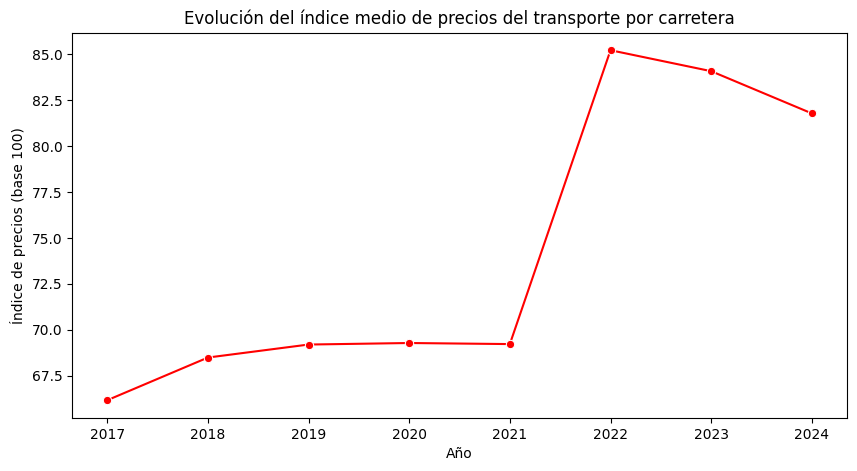

In [23]:
evolucion = df_co497_copy.groupby('Año', as_index=False)['indice'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(data=evolucion, x='Año', y='indice', marker='o', color='red')
plt.title('Evolución del índice medio de precios del transporte por carretera')
plt.xlabel('Año')
plt.ylabel('Índice de precios (base 100)')
plt.show()

C:\Users\esanc\AppData\Local\Temp\ipykernel_31832\3290032055.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=distancia, y='Distancia(Km)', x='indice', palette='viridis')


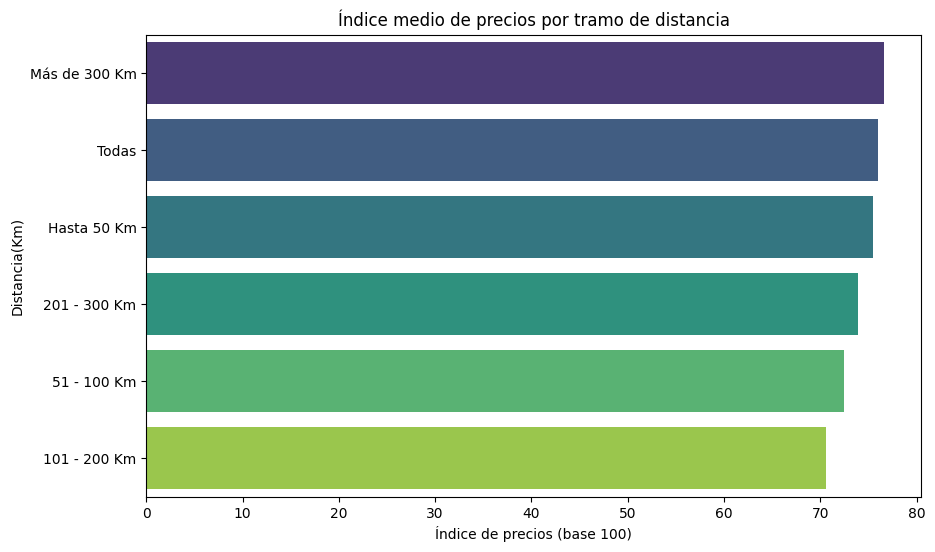

,Distancia(Km),indice
4,Más de 300 Km,76.66
5,Todas,75.98
3,Hasta 50 Km,75.49
1,201 - 300 Km,73.96
2,51 - 100 Km,72.42


In [24]:
distancia = (
    df_co497_copy.groupby('Distancia(Km)', as_index=False)['indice']
    .mean()
    .sort_values('indice', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=distancia, y='Distancia(Km)', x='indice', palette='viridis')
plt.title('Índice medio de precios por tramo de distancia')
plt.xlabel('Índice de precios (base 100)')
plt.ylabel('Distancia(Km)')
plt.show()
distancia.head()

In [25]:
# Filtrar solo variación
df_co497_variacion = df_co497_copy[df_co497_copy['concepto_precio'].str.contains('variación sobre el año anterior', case=False)].copy()
# Renombrar columnas
df_co497_variacion.columns = ['Año', 'Distancia(Km)', 'Precio Medio','Índice Variación']

# REliminar cols innecesarias
df_co497_variacion=df_co497_variacion.drop(columns=['Precio Medio'])

df_co497_variacion.head()

,Año,Distancia(Km),Índice Variación
1,2017,Hasta 50 Km,-0.70
3,2017,51 - 100 Km,-1.30
5,2017,101 - 200 Km,-0.30
7,2017,201 - 300 Km,-0.40
9,2017,Más de 300 Km,-0.40


In [26]:
# Filtrar solo precio medio
df_co497_precio_medio = df_co497_copy[df_co497_copy['concepto_precio'].str.contains('precio medio del año', case=False)].copy()

# Eliminar cols innecesarias
df_co497_precio_medio=df_co497_precio_medio.drop(columns=['concepto_precio'])

# Renombrar columnas
df_co497_precio_medio.columns = ['Año', 'Distancia(Km)', 'Precio Medio']

df_co497_precio_medio.head()

,Año,Distancia(Km),Precio Medio
0,2017,Hasta 50 Km,132.10
2,2017,51 - 100 Km,130.00
4,2017,101 - 200 Km,125.30
6,2017,201 - 300 Km,134.60
8,2017,Más de 300 Km,138.60


In [27]:
df_co497_final = df_co497_precio_medio.merge(
    df_co497_variacion,
    on=['Año','Distancia(Km)'],
    how='inner',
    validate='one_to_one'  # ver si hay duplicados en las claves
)

# Filtrar las filas que NO son totales
df_co497_final = df_co497_final[~df_co497_final['Distancia(Km)'].str.contains('Todas', case=False)].copy()

df_co497_final.sample(5)

,Año,Distancia(Km),Precio Medio,Índice Variación
18,2020,Hasta 50 Km,141.50,2.70
27,2021,201 - 300 Km,138.10,-0.30
38,2023,101 - 200 Km,156.20,4.30
7,2018,51 - 100 Km,130.50,0.40
8,2018,101 - 200 Km,130.40,4.10


In [28]:
ruta_salida = os.path.join(ruta_processed, 'CO497_indice_precios_clean.csv')
df_co497_final.to_csv(ruta_salida, index=False, encoding='utf-8-sig')

print(f"✅ Dataset limpio guardado en:\n{ruta_salida}")

✅ Dataset limpio guardado en:
../data/processed\CO497_indice_precios_clean.csv


## Explorar el archivo CO614 (Costes por Tipo de Vehículo)

In [29]:
print("\n" + "="*40)
print("📂 CO614 - COSTES POR TIPO DE VEHICULO")
print("="*40)


📂 CO614 - COSTES POR TIPO DE VEHICULO


In [30]:

path = os.path.join(ruta_interim, "CO614_Costes_Interim.csv")
df_co614 = pd.read_csv(path, sep=';', encoding='utf-8', decimal=',')

df_co614.shape, df_co614.columns

((2080, 7),
 Index(['año', 'vehiculo', 'categoria_costes', 'subcategoria_costes',
        'tipo_costes', 'costes_unitarios', 'costes_anuales'],
       dtype='object'))

In [31]:

df_co614.columns = ['Año', 'Vehículo', 'Categoría Costes', 'Subcategoría Costes', 'Tipo Costes','Costes Unitarios', 'Costes Anuales']
df_co614.tail(3)


,Año,Vehículo,Categoría Costes,Subcategoría Costes,Tipo Costes,Costes Unitarios,Costes Anuales
2077,2022,articulado portacontenedores,Costes indirectos,indirectos(vehículo-km),indirectos,0.08,8294.28
2078,2023,articulado portacontenedores,Costes indirectos,indirectos(vehículo-km),indirectos,0.08,8225.94
2079,2024,articulado portacontenedores,Costes indirectos,indirectos(vehículo-km),indirectos,0.08,8291.42


In [32]:
df_co614.info()
(df_co614.isna().mean()*100).round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  2080 non-null   int64  
 1   Vehículo             2080 non-null   object 
 2   Categoría Costes     2080 non-null   object 
 3   Subcategoría Costes  2080 non-null   object 
 4   Tipo Costes          2080 non-null   object 
 5   Costes Unitarios     2080 non-null   float64
 6   Costes Anuales       2080 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 113.9+ KB


Año                   0.00
Vehículo              0.00
Categoría Costes      0.00
Subcategoría Costes   0.00
Tipo Costes           0.00
Costes Unitarios      0.00
Costes Anuales        0.00
dtype: float64

In [33]:
df_co614_copy = df_co614.copy()

In [34]:
for c in ['Año', 'Vehículo', 'Categoría Costes', 'Subcategoría Costes', 'Tipo Costes']:
    df_co614_copy[c] = (df_co614_copy[c].astype(str)
             .str.strip().str.title()
             .str.replace(r'\s+', ' ', regex=True))
df_co614_copy.head()

,Año,Vehículo,Categoría Costes,Subcategoría Costes,Tipo Costes,Costes Unitarios,Costes Anuales
0,2017,Articulado De Carga General,Costes Directos,Por Tiempo(Vehiculo-Km),Amortización Vehículo,0.13,15616.61
1,2018,Articulado De Carga General,Costes Directos,Por Tiempo(Vehiculo-Km),Amortización Vehículo,0.13,15791.76
2,2019,Articulado De Carga General,Costes Directos,Por Tiempo(Vehiculo-Km),Amortización Vehículo,0.13,15935.36
3,2020,Articulado De Carga General,Costes Directos,Por Tiempo(Vehiculo-Km),Amortización Vehículo,0.13,16073.84
4,2021,Articulado De Carga General,Costes Directos,Por Tiempo(Vehiculo-Km),Amortización Vehículo,0.14,16234.00


In [35]:
df_co614_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  2080 non-null   object 
 1   Vehículo             2080 non-null   object 
 2   Categoría Costes     2080 non-null   object 
 3   Subcategoría Costes  2080 non-null   object 
 4   Tipo Costes          2080 non-null   object 
 5   Costes Unitarios     2080 non-null   float64
 6   Costes Anuales       2080 non-null   float64
dtypes: float64(2), object(5)
memory usage: 113.9+ KB


In [36]:
df_co614_copy['Año'] = pd.to_numeric(df_co614_copy['Año'], errors='coerce').astype('Int64')


In [37]:
# costes por vehículo
costes_vehiculo = (df_co614_copy.groupby(['Vehículo'], dropna=True)['Costes Anuales']
                   .sum().reset_index(name='Costes por Vehículo'))

costes_vehiculo

,Vehículo,Costes por Vehículo
0,Articulado De Carga General,1113068.97
1,Articulado De Carga General En Transporte Inte...,1584637.62
2,Articulado Portacontenedores,969449.37
3,Cisterna Articulado De Mercancías Peligrosas (...,1207825.27
4,Cisterna Articulado De Mercancías Peligrosas (...,1241451.69
5,Cisterna Articulado De Productos De Alimentación,1251526.27
6,Cisterna Articulado De Productos Pulverulentos,1280884.76
7,Frigorífico Articulado,1202202.99
8,Frigorífico Articulado En Transporte Internaci...,1683189.67
9,Frigorífico De 2 Ejes,714267.17


In [38]:
# Costes por partida
costes_partida = (df_co614_copy.groupby(['Categoría Costes'], dropna=True)['Costes Anuales']
                   .sum().reset_index(name='Total Categoría'))

costes_partida

,Categoría Costes,Total Categoría
0,Costes Directos,20103646.79
1,Costes Indirectos,1306737.13


In [39]:
# Dataset limpio principal
df_co614_copy.to_csv(os.path.join(ruta_processed, 'CO614_costes_estructura_clean.csv'),
          index=False, encoding='utf-8-sig')